![Relax](https://raw.githubusercontent.com/interviewquery/takehomes/relax_1/relax_1/logo.png)

The data is available as two attached CSV files:
```
takehome_user_engagement.csv 
takehome_users.csv
```
The data has the following two tables:

1.  A user table ( `takehome_users.csv`) with data on 12,000 users who
    signed up for the product in the last two years. This table
    includes:

    -   `name`: the user's name

    -   `object_id`: the user's id

    -   `email`: email address

    -   `creation_source`: how their account was created. This takes
        on one of 5 values:
        - `PERSONAL_PROJECTS`: invited to join another user's personal workspace
        - `GUEST_INVITE`: invited to an organization as a guest (limited permissions)
        - `ORG_INVITE`: invited to an organization (as a full member)
        - `SIGNUP`: signed up via the website
        - `SIGNUP_GOOGLE_AUTH`: signed up using Google Authentication (using a Google email account for their login id)

-   `creation_time`: when they created their account

-   `last_session_creation_time`: unix timestamp of last login

-   `opted_in_to_mailing_list`: whether they have opted into receiving
    marketing emails

-   `enabled_for_marketing_drip`: whether they are on the regular
    marketing email drip

-   `org_id`: the organization (group of users) they belong to

-   `invited_by_user_id`: which user invited them to join (if
    applicable).

2.  A usage summary table ( `takehome_user_engagement.csv` ) that has a
    row for each day that a user logged into the product.

Defining an _"adopted user"_ as a user who *has logged into the
product on three separate days in at least one seven-­day period*,
**identify which factors predict future user adoption**.

We suggest spending 1­2 hours on this, but you're welcome to spend more
or less.



In [ ]:
!git clone --branch relax_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/relax_1
!ls

# User Engagement

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_engage = pd.read_csv('takehome_user_engagement.csv')
data_engage = data_engage.set_index(pd.DatetimeIndex(data_engage['time_stamp']))
data_users = pd.read_csv('takehome_users.csv',encoding='latin-1')
data_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [99]:
data_engage.head()

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1


In [101]:
#groups by user, then date by week, and sums number of visits per week
grouped = data_engage.groupby('user_id').resample('1W').sum()
#removes weeks that were imputed for grouping but are NaN
grouped = grouped[grouped['user_id'].isnull()==False].drop('user_id',axis=1)
grouped.head(20)

time_stamp  visited
user_id time_stamp                                                            
1       2014-04-27                                2014-04-22 03:53:30        1
2       2013-11-17                                2013-11-15 03:45:04        1
        2013-11-24                                                  0        0
        2013-12-01                                2013-11-29 03:45:04        1
        2013-12-08                                                  0        0
        2013-12-15                                2013-12-09 03:45:04        1
        2013-12-22                                                  0        0
        2013-12-29                                2013-12-25 03:45:04        1
        2014-01-05                                2013-12-31 03:45:04        1
        2014-01-12                                2014-01-08 03:45:04        1
        2014-01-19                                                  0        0
        2014-01-26                                                  0        0
        2014-02-02                                                  0        0
        2014-02-09  2014-02-03 03:45:042014-02-08 03:45:042014-02-...        3
        2014-02-16             2014-02-13 03:45:042014-02-16 03:45:04        2
        2014-02-23                                                  0        0
        2014-03-02                                                  0        0
        2014-03-09                                2014-03-09 03:45:04        1
        2014-03-16                                2014-03-13 03:45:04        1
        2014-03-23                                                  0        0

# Users

In [102]:
#tags weeks that had less than 3 visits for all users#tags w 
active_users = grouped['visited']>=3
#Groups by users and sums up the number of weeks that had 3 or more visits
active_users = active_users.groupby(level=0).apply(np.sum)
#removes users with no weeks that had 3 or more visits
active_users = active_users[active_users!=0]
active_users = pd.DataFrame(active_users,index=active_users.index)
active_users.columns = ['Active Weeks']
active_users.head(5)

,Active Weeks
user_id,
2,1
10,52
20,1
33,1
42,68


In [103]:
act_user_data = active_users.merge(data_users,left_index=True,right_on='object_id',how='inner')
act_user_data.head()

,Active Weeks,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,52,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,1,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
32,1,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,68,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN


In [117]:
#Pull data on Active users
act_user_data = active_users.merge(data_users,left_index=True,right_on='object_id',how='inner')
act_user_data['Active']=1

#Add Active column to origional Data
data_users['Active']=int(0)
data_users.iloc[list(act_user_data.index),10]=1
model_data = data_users.set_index('object_id').sort_index()

#Prep data for modeling by removing unecessary features
model_data = model_data.drop([ 'name', 'email','last_session_creation_time',],axis=1)
date_feature = model_data.pop('creation_time')
model_data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0


In [119]:
model_data['invited_by_user_id'] = model_data['invited_by_user_id'].fillna(0)
model_data['invited_by_user_id'] = model_data['invited_by_user_id'].apply(
        lambda x: 1 if x!=0 else 0)
model_data = pd.get_dummies(data=model_data,columns=['creation_source'])

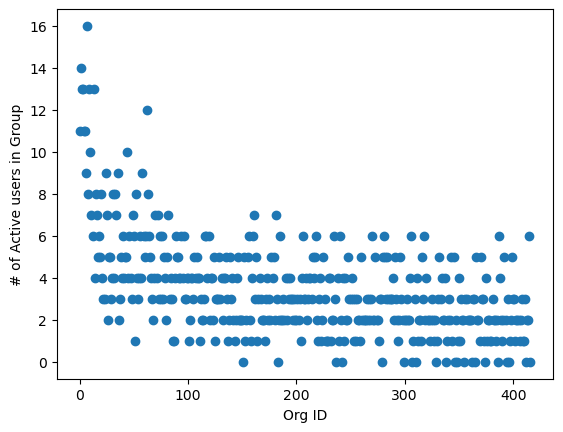

In [121]:
import seaborn
org = model_data.groupby('org_id').sum()
plt.scatter(org.index,org.Active)
plt.ylabel('# of Active users in Group')
plt.xlabel('Org ID')
plt.show()

In [123]:
org_cata = []
for i in model_data['org_id']:
    cata = org.loc[i,'Active']
    org_cata.append(cata)
model_data['org_id'] = org_cata

model_data = pd.get_dummies(data=model_data,columns=['org_id'])
print(model_data.columns)
model_data.head()

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'Active', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'org_id_0', 'org_id_1', 'org_id_2', 'org_id_3', 'org_id_4', 'org_id_5',
       'org_id_6', 'org_id_7', 'org_id_8', 'org_id_9', 'org_id_10',
       'org_id_11', 'org_id_12', 'org_id_13', 'org_id_14', 'org_id_16'],
      dtype='object')


,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,Active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,...,org_id_6,org_id_7,org_id_8,org_id_9,org_id_10,org_id_11,org_id_12,org_id_13,org_id_14,org_id_16
object_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,0,0,1,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,0,1,0,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0,0,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,0,0,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 1 to 12000
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   invited_by_user_id                  12000 non-null  int64
 3   Active                              12000 non-null  int64
 4   creation_source_GUEST_INVITE        12000 non-null  bool 
 5   creation_source_ORG_INVITE          12000 non-null  bool 
 6   creation_source_PERSONAL_PROJECTS   12000 non-null  bool 
 7   creation_source_SIGNUP              12000 non-null  bool 
 8   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  bool 
 9   org_id_0                            12000 non-null  bool 
 10  org_id_1                            12000 non-null  bool 
 11  org_id_2                            12000 non-null  bool 
 12  org_id_3 

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

y = model_data.pop('Active')
x = model_data

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25,random_state=42)

In [79]:
graboost = GradientBoostingClassifier(max_features='sqrt')
parametergra = {'n_estimators':[40,45,50,55,60],'learning_rate':[.01,0.02,0.03,0.04,0.05],
              'max_depth':[1,2,3,4,5]}
grid1 = GridSearchCV(estimator=graboost,param_grid=parametergra,
                     scoring='accuracy',cv=5)
grid1.fit(x_train,y_train)
best_para_gra = grid1.best_params_
best_acc_gra = grid1.best_score_

print('The Tuned Paratmers :\n',best_para_gra,'\nAchieved %s Percent Accuracy' %(best_acc_gra*100))


The Tuned Paratmers :
 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 40} 
Achieved 88.00000000000001 Percent Accuracy


In [80]:
gbm = GradientBoostingClassifier(max_features='sqrt',
                                 n_estimators=50,learning_rate=.05,max_depth= 3)
gbm.fit(x_train,y_train)
feature_coef = pd.DataFrame(gbm.feature_importances_).transpose()
feature_coef.columns = list(model_data.columns)
feature_coef.index = ['GBM'] 
feature_coef.transpose().sort_values(by='GBM',ascending=False)

,GBM
creation_source_PERSONAL_PROJECTS,0.200647
org_id_5,0.151854
org_id_0,0.140367
org_id_1,0.103300
org_id_11,0.102446
org_id_6,0.075962
creation_source_GUEST_INVITE,0.050888
org_id_12,0.034685
creation_source_SIGNUP_GOOGLE_AUTH,0.020410
enabled_for_marketing_drip,0.012627


These would be the importance of each feature, starting from the top as the most important. 